In [1]:
import pandas as pd

In [2]:
performance_csv = pd.read_csv("/home/lillian/Documents/TenAcademy/week10/automatic_storyboard_for_Ad/data_preparation/performance_data.csv")

In [3]:
performance_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game_id       905 non-null    object 
 1   preview_link  905 non-null    object 
 2   ER            905 non-null    float64
 3   CTR           905 non-null    float64
dtypes: float64(2), object(2)
memory usage: 28.4+ KB


In [5]:
performance_csv.head(5)

,game_id,preview_link,ER,CTR
0,bfbf7a2b7ac635e67877b1ab87fd6629,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.209269,0.058438
1,945010afbf9a55bbdffcb0895f946155,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.274552,0.074731
2,e68e20f592457b875ce29757ab855dfe,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103688,0.042228
3,adunit-nestle-purina-friskies-mob,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.136963,0.005393
4,adunit-lionsgate-uwomt-user-slider-sensory-vid...,https://s3.us-west-1.amazonaws.com/a.futureadl...,0.114208,0.016443


In [7]:
performance_csv.loc[0].preview_link

'https://s3.us-east-1.amazonaws.com/a.futureadlabs.com-us-east-1-backup/us-east-1/games/bfbf7a2b7ac635e67877b1ab87fd6629/b7a604b3b08f0862ef0e/index.html'

In [10]:
def locate_image_on_image(locate_image: str, on_image: str, prefix: str = '', visualize: bool = False, color: tuple[int, int, int] = (0, 0, 255)):
    try:

        image = cv2.imread(on_image)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        template = cv2.imread(locate_image, 0)

        result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
        _, _, _, max_loc = cv2.minMaxLoc(result)

        height, width = template.shape[:2]

        top_left = max_loc
        bottom_right = (top_left[0] + width, top_left[1] + height)

        if visualize:
            cv2.rectangle(image, top_left, bottom_right, color, 1)
            plt.figure(figsize=(10, 10))
            plt.axis('off')
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(image)

        return {f'{prefix}top_left_pos': top_left, f'{prefix}bottom_right_pos': bottom_right}

    except cv2.error as err:
        print(err)

In [12]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 2.2 MB/s eta 0:00:00m eta 0:00:010:00:01


In [16]:
import cv2
import matplotlib.pyplot as plt

{'eng_top_left_pos': (224, 17), 'eng_bottom_right_pos': (377, 92)}

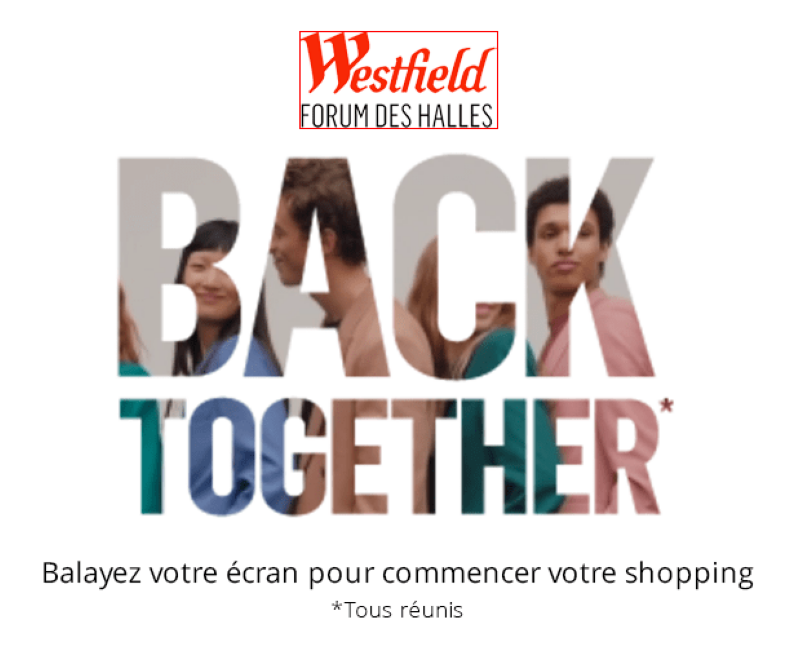

In [21]:
locate_image_on_image('/home/lillian/Documents/TenAcademy/week10/automatic_storyboard_for_Ad/data_preparation/organized_data/3a78fb0ee7c6e7fa0101fe1d6f49de29/images/logo_1.png','/home/lillian/Documents/TenAcademy/week10/automatic_storyboard_for_Ad/data_preparation/organized_data/3a78fb0ee7c6e7fa0101fe1d6f49de29/images/_preview.png', prefix = 'eng_', visualize=True)

In [18]:
!pip install extcolors
!pip install colormap

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 KB 462.7 kB/s eta 0:00:00 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 KB 1.3 MB/s eta 0:00:001.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 714.8/714.8 KB 1.9 MB/s eta 0:00:001.8 MB/s eta 0:00:01
  Created wheel for colormap: filename=colormap-1.0.6-py3-none-any.whl size=15830 sha256=7a96878ca0a5f6da0ccb764acbc48d4c5a24813e9f771fdfe9994da14e881f71
  Stored in directory: /home/lillian/.cache/pip/wheels/ea/c2/2c/8799f753a6c0acef2a86a40c7c091fa70d0f49785f1f28fba1
Successfully built colormap
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 4.1.0
    Uninstalling platformdirs-4.1.0:
      Successfully uninstalled platformdirs-4.1.0


In [19]:
import extcolors
import pandas as pd
from colormap import rgb2hex
from PIL import Image

In [20]:
def identify_color_composition(image,
                               tolerance: int = 12,
                               limit: int = 2,
                               visualize: bool = False) -> None:
    """Function that identifies the color composition of a
    given image path."""

    extracted_colors = extcolors.extract_from_path(
        image, tolerance=tolerance, limit=limit)

    identified_colors = color_to_df(extracted_colors)

    if not visualize:
        return identified_colors

    list_color = list(identified_colors['c_code'])
    list_percent = [int(i) for i in list(identified_colors['occurrence'])]

    text_c = [c + ' ' + str(round(p*100/sum(list_percent), 1)) + '%' for c, p in zip(list_color,
                                                                                     list_percent)]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(100, 100), dpi=10)
    wedges, _ = ax[0].pie(list_percent,
                          labels=text_c,
                          labeldistance=1.05,
                          colors=list_color,
                          textprops={'fontsize': 60, 'color': 'black'}
                          )

    plt.setp(wedges, width=0.3)

    # create space in the center
    plt.setp(wedges, width=0.36)

    ax[0].set_aspect("equal")
    fig.set_facecolor('grey')

    ax[1].imshow(Image.open(image))

    plt.show()

    return identified_colors


def color_to_df(extracted_colors: tuple):
    """Converts RGB Color values from extcolors output to HEX Values."""

    colors_pre_list = str(extracted_colors).replace(
        '([(', '').replace(')],', '), (').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')', '')
                  for i in colors_pre_list]

    # convert RGB to HEX code
    df_rgb_values = [(int(i.split(", ")[0].replace("(", "")),
                      int(i.split(", ")[1]),
                      int(i.split(", ")[2].replace(")", ""))) for i in df_rgb]

    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(", "")),
                           int(i.split(", ")[1]),
                           int(i.split(", ")[2].replace(")", ""))) for i in df_rgb]

    colors_df = pd.DataFrame(zip(df_color_up, df_rgb_values, df_percent),
                             columns=['c_code', 'rgb', 'occurrence'])

    return colors_df

In [22]:
sample_image = "/home/lillian/Documents/TenAcademy/week10/automatic_storyboard_for_Ad/data_preparation/organized_data/3a78fb0ee7c6e7fa0101fe1d6f49de29/images/_preview.png"

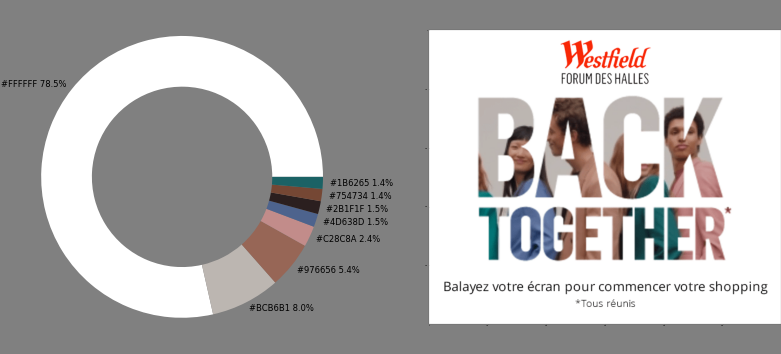

,c_code,rgb,occurrence
0,#FFFFFF,"(255, 255, 255)",220779
1,#BCB6B1,"(188, 182, 177)",22398
2,#976656,"(151, 102, 86)",15076
3,#C28C8A,"(194, 140, 138)",6672
4,#4D638D,"(77, 99, 141)",4244
5,#2B1F1F,"(43, 31, 31)",4167
6,#754734,"(117, 71, 52)",3947
7,#1B6265,"(27, 98, 101)",3834


In [24]:
identify_color_composition(sample_image, tolerance = 12, limit=8, visualize=True)

In [29]:
!pip install pytesseract

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement pytesseract (from versions: none)
ERROR: No matching distribution found for pytesseract


In [28]:
import pytesseract
import cv2
import numpy as np
from typing import List, Tuple

ModuleNotFoundError: No module named 'pytesseract'